<a href="https://colab.research.google.com/github/Lcocks/DS6050-DeepLearning/blob/main/12_1_Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodality

### **Part A: Pretrained CLIP** (Main)
Focus: Understanding and using pretrained CLIP

### **Part B: Toy CLIP Training** (Optional)
Focus: Training from scratch to understand the mechanism

In [ ]:
!pip -q install open_clip_torch==2.26.1 einops==0.8.0 --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 5.8 MB/s eta 0:00:00


Using device: cuda
PyTorch version: 2.8.0+cu126

PART 1: Pretrained CLIP - Zero-Shot Classification

Loading pretrained CLIP model...
✓ Loaded CLIP ViT-B-32 pretrained on laion2b_s34b_b79k

------------------------------------------------------------
Demonstrating Zero-Shot Classification
------------------------------------------------------------

Creating text embeddings for CIFAR-10 classes...
Text embeddings shape: torch.Size([10, 512])
  - 10 classes
  - 512-dimensional embeddings

Evaluating zero-shot accuracy on 1000 test images...


Zero-shot classification:   0%|          | 0/8 [00:00<?, ?it/s]


✓ Zero-shot accuracy: 93.40%
  Note: CLIP was never trained on CIFAR-10 labels!
  It learned to align images and text from web data.

PART 2: Visualizing the Joint Embedding Space

✓ Collected 500 image embeddings
✓ Have 10 text embeddings

Reducing to 2D with PCA...
✓ Saved visualization to 'clip_embedding_space.png'


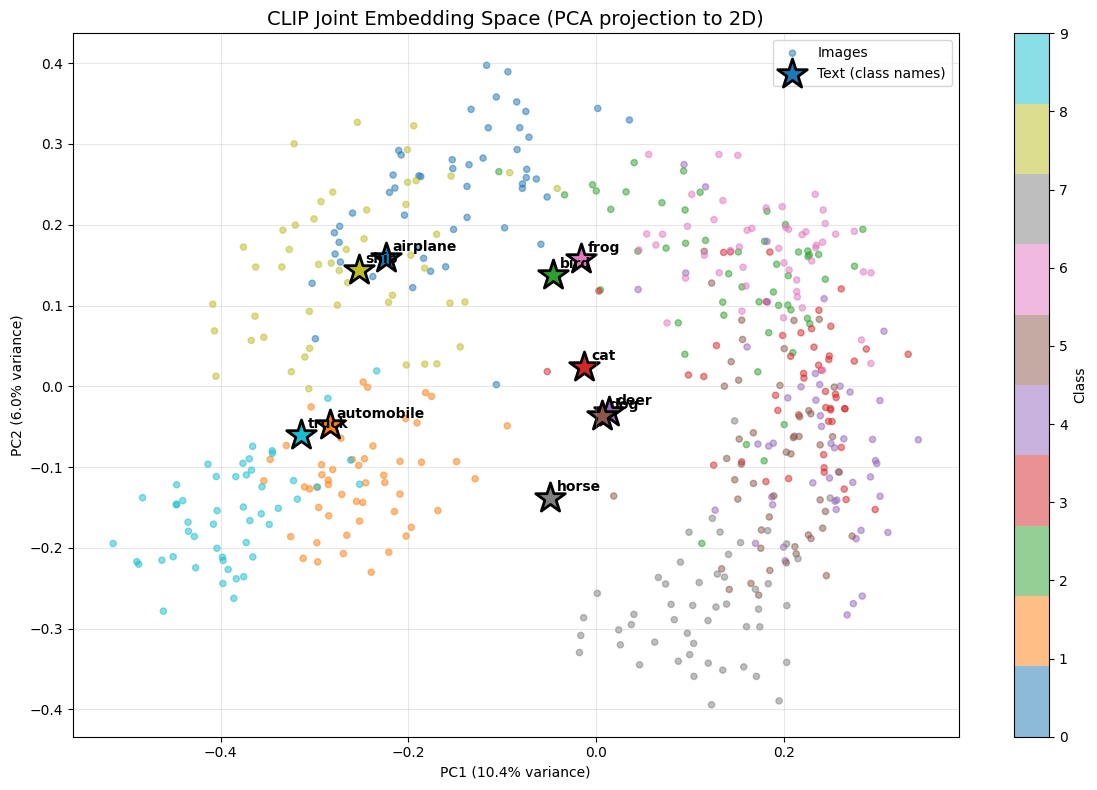


Observations:
  - Images cluster by semantic category
  - Text labels (stars) are near their image clusters
  - This shared space enables zero-shot classification!

PART 3: Text-to-Image Retrieval

Creating gallery of 100 images...
✓ Gallery embeddings shape: torch.Size([100, 512])

Demonstrating text-to-image retrieval:

Query: 'a photo of a dog'
  1. Image  33 | Similarity: 0.301 | True label: dog
  2. Image  39 | Similarity: 0.280 | True label: dog
  3. Image  61 | Similarity: 0.280 | True label: cat
  4. Image  31 | Similarity: 0.272 | True label: dog
  5. Image  12 | Similarity: 0.271 | True label: dog
  6. Image  85 | Similarity: 0.267 | True label: dog
  7. Image   5 | Similarity: 0.262 | True label: frog
  8. Image  24 | Similarity: 0.261 | True label: dog


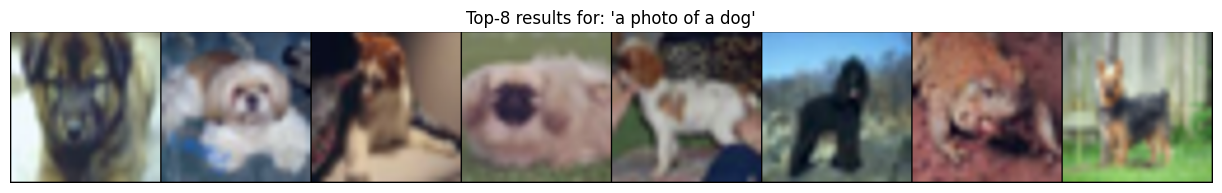


Query: 'a vehicle with wheels'
  1. Image  66 | Similarity: 0.248 | True label: automobile
  2. Image   6 | Similarity: 0.247 | True label: automobile
  3. Image  11 | Similarity: 0.238 | True label: truck
  4. Image  81 | Similarity: 0.228 | True label: automobile
  5. Image  74 | Similarity: 0.226 | True label: airplane
  6. Image   9 | Similarity: 0.224 | True label: automobile
  7. Image  45 | Similarity: 0.222 | True label: truck
  8. Image  37 | Similarity: 0.219 | True label: automobile


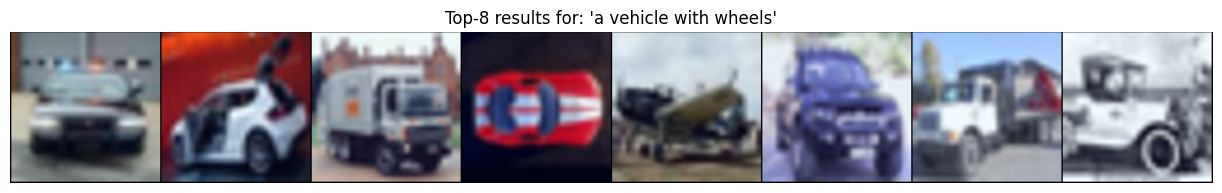


Query: 'an animal with four legs'
  1. Image   5 | Similarity: 0.249 | True label: frog
  2. Image  64 | Similarity: 0.243 | True label: frog
  3. Image  94 | Similarity: 0.239 | True label: deer
  4. Image  46 | Similarity: 0.234 | True label: cat
  5. Image  35 | Similarity: 0.234 | True label: bird
  6. Image  83 | Similarity: 0.226 | True label: horse
  7. Image  12 | Similarity: 0.225 | True label: dog
  8. Image  36 | Similarity: 0.222 | True label: deer


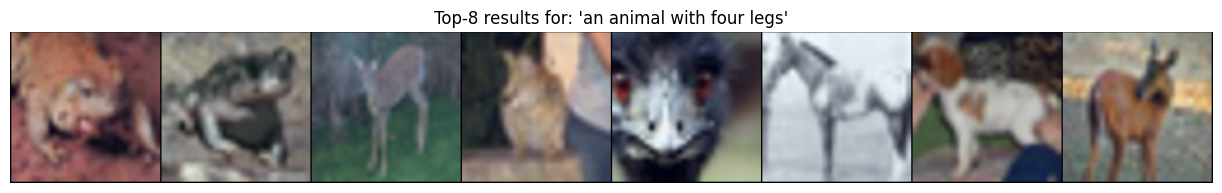


Query: 'something that flies'
  1. Image  97 | Similarity: 0.230 | True label: airplane
  2. Image  21 | Similarity: 0.214 | True label: airplane
  3. Image  10 | Similarity: 0.213 | True label: airplane
  4. Image  22 | Similarity: 0.206 | True label: deer
  5. Image  27 | Similarity: 0.201 | True label: airplane
  6. Image  25 | Similarity: 0.193 | True label: bird
  7. Image  67 | Similarity: 0.189 | True label: bird
  8. Image  93 | Similarity: 0.187 | True label: frog


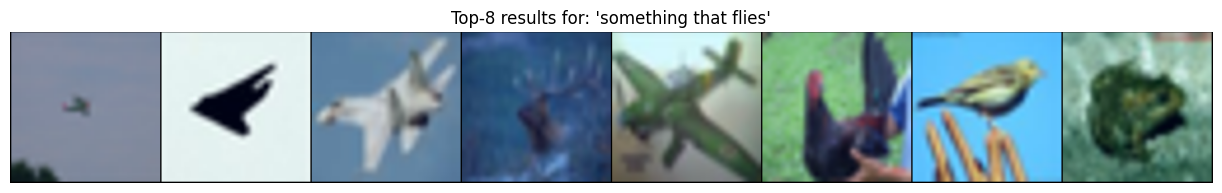


PART 4: Understanding Contrastive Learning

Creating 16 image-text pairs...
✓ Saved visualization to 'similarity_matrix.png'


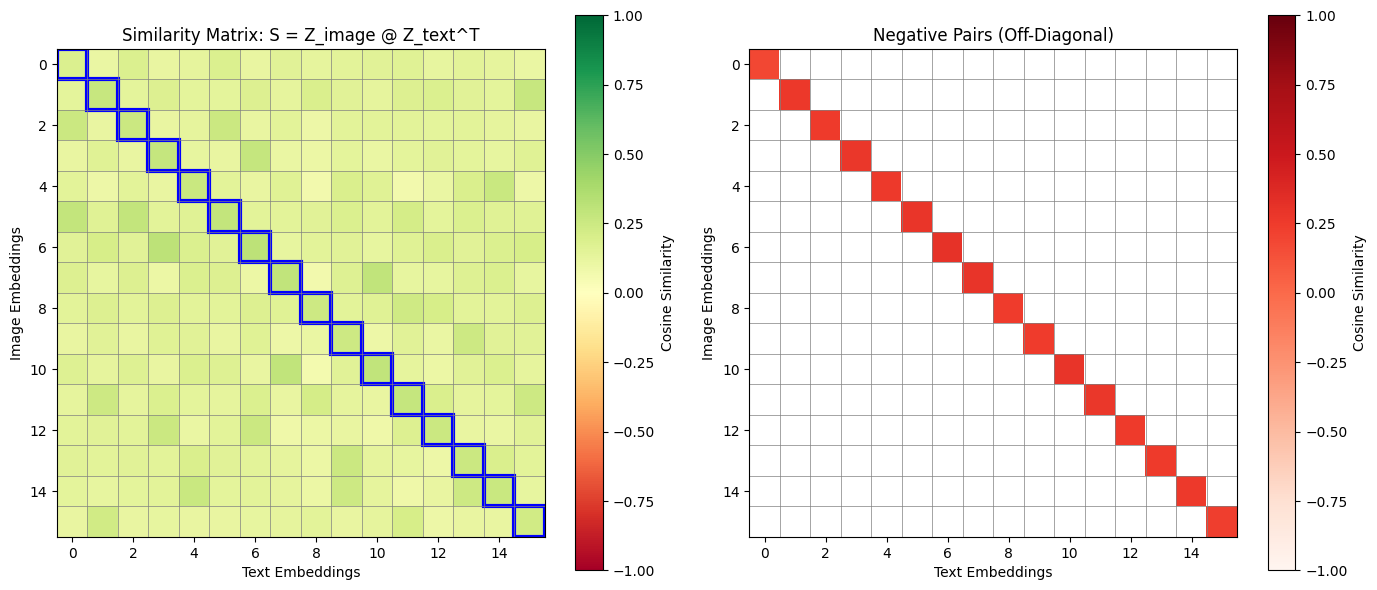


Similarity Statistics:
  Positive pairs (diagonal):    mean=0.261, std=0.028
  Negative pairs (off-diagonal): mean=0.150, std=0.046

Key insight: Positive pairs have higher similarity!
  This is what contrastive learning achieves.

PART 5: InfoNCE Loss - The Heart of CLIP

InfoNCE Loss Walkthrough
------------------------------------------------------------
Example similarity matrix (N=4):
[[ 0.696 -0.041  0.194  0.457]
 [-0.07   1.094  0.474  0.23 ]
 [-0.141  0.163  0.728 -0.14 ]
 [ 0.073 -0.574 -0.517  0.576]]

Loss computation:
  Temperature τ = 0.07
  Loss (image→text): 0.0086
  Loss (text→image): 0.0500
  Total symmetric loss: 0.0293

Key points:
  1. Each row is a multi-class classification (pick the matching column)
  2. All other pairs in the batch serve as negatives
  3. Larger batches → more negatives → better training signal
  4. Temperature τ controls how 'peaked' the distribution is

PART 6: Experiments for Students

Try these experiments to deepen your understanding:

1.

In [ ]:
"""
Lecture 12.1: Multimodality with CLIP
======================================

This notebook demonstrates:
1. **Pretrained CLIP**: Zero-shot classification and text→image retrieval
2. **Joint Embedding Space**: Visualizing how images and text align
3. **Contrastive Learning**: The N×N similarity matrix and InfoNCE loss
4. **Toy CLIP**: Training from scratch to understand the mechanism

Learning Objectives:
- Understand how CLIP creates a shared embedding space
- See contrastive learning in action (InfoNCE loss)
- Experiment with zero-shot classification
- Build intuition for multimodal alignment

Key Equations:
- Symmetric InfoNCE: L = 1/2 * [L_i→t + L_t→i]
  where L_i→t = -1/N * Σ log(exp(s_ii/τ) / Σ_j exp(s_ij/τ))
- Similarity matrix: S = (1/τ) * Z_I @ Z_T^T
"""

# ============================================================
# 0) Setup and Imports
# ============================================================

# Install required packages (uncomment if needed)
# !pip install -q open_clip_torch==2.26.1 einops==0.8.0

import os, math, random, time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import DataLoader, Subset

import torchvision
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torchvision.utils import make_grid

import open_clip
from sklearn.decomposition import PCA
from IPython.display import display, Markdown

# Reproducibility
def set_seed(seed=42):
    """Set all random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(f"PyTorch version: {torch.__version__}")

# ============================================================
# 1) Load Pretrained CLIP
# ============================================================
print("\n" + "="*60)
print("PART 1: Pretrained CLIP - Zero-Shot Classification")
print("="*60)

# CLIP expects 224×224 images with specific normalization
# These values come from CLIP's training on LAION-2B
CLIP_IMAGE_SIZE = 224
CLIP_MEAN = (0.48145466, 0.4578275, 0.40821073)
CLIP_STD = (0.26862954, 0.26130258, 0.27577711)

clip_transform = transforms.Compose([
    transforms.Resize((CLIP_IMAGE_SIZE, CLIP_IMAGE_SIZE),
                     interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize(mean=CLIP_MEAN, std=CLIP_STD),
])

# Load CIFAR-10 dataset
root = "./data"
cifar_train = CIFAR10(root, train=True, download=True)
cifar_test = CIFAR10(root, train=False, download=True)

# Wrapper to apply CLIP transforms on-the-fly
class CIFARWithTransform(torch.utils.data.Dataset):
    """Wrapper to apply transforms to CIFAR-10"""
    def __init__(self, base_dataset, transform):
        self.base = base_dataset
        self.transform = transform

    def __len__(self):
        return len(self.base)

    def __getitem__(self, idx):
        img, label = self.base[idx]
        return self.transform(img), label

cifar_test_clip = CIFARWithTransform(cifar_test, clip_transform)

# Load pretrained CLIP model (ViT-B/32 trained on LAION-2B)
print("\nLoading pretrained CLIP model...")
model_name = "ViT-B-32"
pretrained = "laion2b_s34b_b79k"  # ~400M image-text pairs

clip_model, _, _ = open_clip.create_model_and_transforms(
    model_name, pretrained=pretrained, device=device
)
clip_model.eval()
print(f"✓ Loaded CLIP {model_name} pretrained on {pretrained}")

# ============================================================
# 2) Zero-Shot Classification
# ============================================================
print("\n" + "-"*60)
print("Demonstrating Zero-Shot Classification")
print("-"*60)

# CIFAR-10 class names
CIFAR_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                 'dog', 'frog', 'horse', 'ship', 'truck']

# Prompt engineering: use multiple templates and ensemble
# This improves robustness compared to single prompt
PROMPT_TEMPLATES = [
    "a photo of a {}.",
    "a blurry photo of a {}.",
    "a high quality photo of a {}.",
    "a photo of the small {}.",
    "a photo of the large {}.",
]

def create_text_embeddings(class_names, templates, model, device):
    """
    Create text embeddings for zero-shot classification.

    For each class, we:
    1. Generate multiple prompts from templates
    2. Encode each prompt
    3. Average (ensemble) the embeddings
    4. Normalize to unit length

    This is called "prompt ensembling" and improves robustness.
    """
    text_embeddings = []

    with torch.no_grad():
        for class_name in class_names:
            # Generate all prompts for this class
            prompts = [template.format(class_name) for template in templates]

            # Tokenize and encode
            tokens = open_clip.tokenize(prompts).to(device)
            embeddings = model.encode_text(tokens)  # (num_templates, embedding_dim)

            # Normalize each embedding
            embeddings = F.normalize(embeddings, dim=-1)

            # Ensemble: average and re-normalize
            mean_embedding = embeddings.mean(dim=0, keepdim=True)
            mean_embedding = F.normalize(mean_embedding, dim=-1)

            text_embeddings.append(mean_embedding)

    # Stack into (num_classes, embedding_dim)
    text_embeddings = torch.cat(text_embeddings, dim=0)
    return text_embeddings

print("\nCreating text embeddings for CIFAR-10 classes...")
text_embeddings = create_text_embeddings(
    CIFAR_CLASSES, PROMPT_TEMPLATES, clip_model, device
)
print(f"Text embeddings shape: {text_embeddings.shape}")
print(f"  - {len(CIFAR_CLASSES)} classes")
print(f"  - {text_embeddings.shape[1]}-dimensional embeddings")

# Evaluate on a subset for speed
N_EVAL = 1000  # Increase for more accurate results
print(f"\nEvaluating zero-shot accuracy on {N_EVAL} test images...")

eval_subset = Subset(cifar_test_clip, list(range(N_EVAL)))
eval_loader = DataLoader(
    eval_subset, batch_size=128, shuffle=False,
    num_workers=2, pin_memory=True
)

correct = 0
total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for images, labels in tqdm(eval_loader, desc="Zero-shot classification"):
        images = images.to(device)

        # Encode images
        image_embeddings = clip_model.encode_image(images)  # (batch_size, embedding_dim)
        image_embeddings = F.normalize(image_embeddings, dim=-1)

        # Compute similarities (cosine similarity = dot product after normalization)
        # CLIP uses a learned temperature scaling of ~100
        logits = 100.0 * image_embeddings @ text_embeddings.T  # (batch_size, num_classes)

        # Predict class with highest similarity
        predictions = logits.argmax(dim=-1).cpu()

        correct += (predictions == labels).sum().item()
        total += labels.size(0)

        all_predictions.extend(predictions.tolist())
        all_labels.extend(labels.tolist())

accuracy = 100.0 * correct / total
print(f"\n✓ Zero-shot accuracy: {accuracy:.2f}%")
print(f"  Note: CLIP was never trained on CIFAR-10 labels!")
print(f"  It learned to align images and text from web data.")

# ============================================================
# 3) Visualizing the Joint Embedding Space
# ============================================================
print("\n" + "="*60)
print("PART 2: Visualizing the Joint Embedding Space")
print("="*60)

def visualize_embedding_space(model, dataset, class_names, n_samples=500):
    """
    Visualize how images and text are organized in the joint embedding space.

    We'll:
    1. Sample images from multiple classes
    2. Get their embeddings + text embeddings
    3. Use PCA to project to 2D
    4. Plot to see clustering
    """
    print(f"\nCollecting {n_samples} image embeddings...")

    # Sample evenly from each class
    samples_per_class = n_samples // len(class_names)

    image_embeddings_list = []
    labels_list = []

    with torch.no_grad():
        for class_idx in range(len(class_names)):
            # Get indices for this class
            class_indices = [i for i, (_, label) in enumerate(dataset)
                           if label == class_idx]

            # Sample
            selected = random.sample(class_indices,
                                    min(samples_per_class, len(class_indices)))

            for idx in selected:
                img, label = dataset[idx]
                img = img.unsqueeze(0).to(device)

                emb = model.encode_image(img)
                emb = F.normalize(emb, dim=-1)

                image_embeddings_list.append(emb.cpu())
                labels_list.append(label)

    # Combine
    image_embeddings = torch.cat(image_embeddings_list, dim=0).numpy()  # (n_samples, d)
    text_embeddings_np = text_embeddings.cpu().numpy()  # (num_classes, d)

    print(f"✓ Collected {len(image_embeddings)} image embeddings")
    print(f"✓ Have {len(text_embeddings_np)} text embeddings")

    # Combine for PCA
    all_embeddings = np.vstack([image_embeddings, text_embeddings_np])

    # PCA to 2D
    print("\nReducing to 2D with PCA...")
    pca = PCA(n_components=2)
    all_2d = pca.fit_transform(all_embeddings)

    images_2d = all_2d[:len(image_embeddings)]
    text_2d = all_2d[len(image_embeddings):]

    # Plot
    plt.figure(figsize=(12, 8))

    # Plot image embeddings
    scatter = plt.scatter(images_2d[:, 0], images_2d[:, 1],
                         c=labels_list, cmap='tab10',
                         alpha=0.5, s=20, label='Images')

    # Plot text embeddings
    for i, class_name in enumerate(class_names):
        plt.scatter(text_2d[i, 0], text_2d[i, 1],
                   marker='*', s=500, c=[plt.cm.tab10(i)],
                   edgecolors='black', linewidths=2)
        plt.annotate(class_name, (text_2d[i, 0], text_2d[i, 1]),
                    fontsize=10, fontweight='bold',
                    xytext=(5, 5), textcoords='offset points')

    plt.colorbar(scatter, label='Class', ticks=range(len(class_names)))
    plt.title('CLIP Joint Embedding Space (PCA projection to 2D)', fontsize=14)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
    plt.legend(['Images', 'Text (class names)'])
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('clip_embedding_space.png', dpi=150, bbox_inches='tight')
    print("✓ Saved visualization to 'clip_embedding_space.png'")
    plt.show()

    print("\nObservations:")
    print("  - Images cluster by semantic category")
    print("  - Text labels (stars) are near their image clusters")
    print("  - This shared space enables zero-shot classification!")

# Run visualization
visualize_embedding_space(clip_model, cifar_test_clip, CIFAR_CLASSES, n_samples=500)

# ============================================================
# 4) Text-to-Image Retrieval
# ============================================================
print("\n" + "="*60)
print("PART 3: Text-to-Image Retrieval")
print("="*60)

# Create a small gallery
GALLERY_SIZE = 100
gallery_indices = list(range(GALLERY_SIZE))
gallery_dataset = Subset(cifar_test_clip, gallery_indices)
gallery_loader = DataLoader(gallery_dataset, batch_size=GALLERY_SIZE, shuffle=False)

print(f"\nCreating gallery of {GALLERY_SIZE} images...")
with torch.no_grad():
    gallery_images, gallery_labels = next(iter(gallery_loader))
    gallery_images = gallery_images.to(device)

    # Get image embeddings
    gallery_embeddings = clip_model.encode_image(gallery_images)
    gallery_embeddings = F.normalize(gallery_embeddings, dim=-1)

print(f"✓ Gallery embeddings shape: {gallery_embeddings.shape}")

def retrieve_images(query_text, top_k=8):
    """
    Retrieve top-k most similar images to the query text.

    Steps:
    1. Encode query text
    2. Compute cosine similarities with all gallery images
    3. Return top-k matches
    """
    with torch.no_grad():
        # Encode query
        tokens = open_clip.tokenize([query_text]).to(device)
        query_embedding = clip_model.encode_text(tokens)
        query_embedding = F.normalize(query_embedding, dim=-1)

        # Compute similarities
        similarities = (gallery_embeddings @ query_embedding.T).squeeze(1)  # (gallery_size,)

        # Get top-k
        top_k_scores, top_k_indices = similarities.topk(top_k)

        # Prepare images for display (move indices to CPU for indexing)
        top_k_indices_cpu = top_k_indices.cpu()
        retrieved_images = gallery_images[top_k_indices_cpu].cpu()
        retrieved_labels = gallery_labels[top_k_indices_cpu]

        # Create grid
        grid = make_grid(retrieved_images, nrow=top_k, padding=2, normalize=True)

        # Display
        print(f"\n{'='*60}")
        print(f"Query: '{query_text}'")
        print(f"{'='*60}")
        for i, (idx, score, label) in enumerate(zip(top_k_indices_cpu, top_k_scores.cpu(), retrieved_labels)):
            print(f"  {i+1}. Image {idx.item():3d} | "
                  f"Similarity: {score.item():.3f} | "
                  f"True label: {CIFAR_CLASSES[label]}")

        plt.figure(figsize=(15, 2))
        plt.imshow(transforms.ToPILImage()(grid))
        plt.axis('off')
        plt.title(f"Top-{top_k} results for: '{query_text}'", fontsize=12)
        plt.tight_layout()
        plt.show()

# Try different queries
print("\nDemonstrating text-to-image retrieval:")
retrieve_images("a photo of a dog", top_k=8)
retrieve_images("a vehicle with wheels", top_k=8)
retrieve_images("an animal with four legs", top_k=8)
retrieve_images("something that flies", top_k=8)

# ============================================================
# 5) Understanding Contrastive Learning: The Similarity Matrix
# ============================================================
print("\n" + "="*60)
print("PART 4: Understanding Contrastive Learning")
print("="*60)

def visualize_similarity_matrix(model, dataset, num_pairs=16):
    """
    Visualize the N×N similarity matrix from lecture.

    This shows how contrastive learning works:
    - Diagonal: positive pairs (matching image-text)
    - Off-diagonal: negative pairs (mismatched)

    Goal: maximize diagonal, minimize off-diagonal
    """
    print(f"\nCreating {num_pairs} image-text pairs...")

    # Sample random images
    indices = random.sample(range(len(dataset)), num_pairs)
    images = []
    captions = []

    for idx in indices:
        img, label = dataset[idx]
        images.append(img)
        # Create simple caption
        captions.append(f"a photo of a {CIFAR_CLASSES[label]}")

    images = torch.stack(images).to(device)

    # Get embeddings
    with torch.no_grad():
        image_embeddings = model.encode_image(images)
        image_embeddings = F.normalize(image_embeddings, dim=-1)

        text_tokens = open_clip.tokenize(captions).to(device)
        text_embeddings = model.encode_text(text_tokens)
        text_embeddings = F.normalize(text_embeddings, dim=-1)

    # Compute similarity matrix: S = Z_I @ Z_T^T
    # Move to CPU for numpy operations
    similarity_matrix = (image_embeddings @ text_embeddings.T).cpu().numpy()  # (N, N)

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Raw similarity matrix
    im1 = axes[0].imshow(similarity_matrix, cmap='RdYlGn', vmin=-1, vmax=1)
    axes[0].set_title('Similarity Matrix: S = Z_image @ Z_text^T', fontsize=12)
    axes[0].set_xlabel('Text Embeddings')
    axes[0].set_ylabel('Image Embeddings')
    plt.colorbar(im1, ax=axes[0], label='Cosine Similarity')

    # Add grid
    for i in range(num_pairs):
        axes[0].axhline(i-0.5, color='gray', linewidth=0.5)
        axes[0].axvline(i-0.5, color='gray', linewidth=0.5)

    # Highlight diagonal
    for i in range(num_pairs):
        axes[0].add_patch(plt.Rectangle((i-0.5, i-0.5), 1, 1,
                                       fill=False, edgecolor='blue', linewidth=3))

    # Mask to show positive vs negative
    mask = np.ones_like(similarity_matrix)
    np.fill_diagonal(mask, 0)

    masked_sim = np.ma.array(similarity_matrix, mask=mask)
    im2 = axes[1].imshow(masked_sim, cmap='Reds', vmin=-1, vmax=1)
    axes[1].set_title('Negative Pairs (Off-Diagonal)', fontsize=12)
    axes[1].set_xlabel('Text Embeddings')
    axes[1].set_ylabel('Image Embeddings')
    plt.colorbar(im2, ax=axes[1], label='Cosine Similarity')

    # Add grid
    for i in range(num_pairs):
        axes[1].axhline(i-0.5, color='gray', linewidth=0.5)
        axes[1].axvline(i-0.5, color='gray', linewidth=0.5)

    plt.tight_layout()
    plt.savefig('similarity_matrix.png', dpi=150, bbox_inches='tight')
    print("✓ Saved visualization to 'similarity_matrix.png'")
    plt.show()

    # Statistics
    diagonal = np.diag(similarity_matrix)
    off_diagonal = similarity_matrix[~np.eye(num_pairs, dtype=bool)]

    print("\nSimilarity Statistics:")
    print(f"  Positive pairs (diagonal):    mean={diagonal.mean():.3f}, std={diagonal.std():.3f}")
    print(f"  Negative pairs (off-diagonal): mean={off_diagonal.mean():.3f}, std={off_diagonal.std():.3f}")
    print(f"\nKey insight: Positive pairs have higher similarity!")
    print(f"  This is what contrastive learning achieves.")

visualize_similarity_matrix(clip_model, cifar_test_clip, num_pairs=16)

# ============================================================
# 6) InfoNCE Loss Explained
# ============================================================
print("\n" + "="*60)
print("PART 5: InfoNCE Loss - The Heart of CLIP")
print("="*60)

def demonstrate_infonce_loss():
    """
    Show how InfoNCE loss works with a small example.
    """
    print("\nInfoNCE Loss Walkthrough")
    print("-" * 60)

    # Create toy example with 4 pairs
    N = 4
    tau = 0.07  # temperature

    # Simulate similarity matrix (random but diagonal > off-diagonal)
    np.random.seed(42)
    similarity_matrix = np.random.randn(N, N) * 0.3
    np.fill_diagonal(similarity_matrix, np.random.randn(N) * 0.3 + 1.0)

    print(f"Example similarity matrix (N={N}):")
    print(similarity_matrix.round(3))

    # Compute InfoNCE loss
    # For each row i, we treat it as a classification problem:
    # - Positive: column i
    # - Negatives: all other columns

    logits = similarity_matrix / tau
    labels = np.arange(N)

    # Convert to torch for easy cross-entropy
    logits_tensor = torch.tensor(logits, dtype=torch.float32)
    labels_tensor = torch.tensor(labels, dtype=torch.long)

    # Image-to-Text loss
    loss_i2t = F.cross_entropy(logits_tensor, labels_tensor)

    # Text-to-Image loss (transpose)
    loss_t2i = F.cross_entropy(logits_tensor.T, labels_tensor)

    # Symmetric loss
    loss_total = 0.5 * (loss_i2t + loss_t2i)

    print(f"\nLoss computation:")
    print(f"  Temperature τ = {tau}")
    print(f"  Loss (image→text): {loss_i2t.item():.4f}")
    print(f"  Loss (text→image): {loss_t2i.item():.4f}")
    print(f"  Total symmetric loss: {loss_total.item():.4f}")

    print("\nKey points:")
    print("  1. Each row is a multi-class classification (pick the matching column)")
    print("  2. All other pairs in the batch serve as negatives")
    print("  3. Larger batches → more negatives → better training signal")
    print("  4. Temperature τ controls how 'peaked' the distribution is")

demonstrate_infonce_loss()

# ============================================================
# 7) Experiments & Exploration
# ============================================================
print("\n" + "="*60)
print("PART 6: Experiments for Students")
print("="*60)

print("""
Try these experiments to deepen your understanding:

1. **Prompt Engineering**
   - Modify PROMPT_TEMPLATES and see how accuracy changes
   - Try domain-specific prompts (e.g., "a professional photo of {}")

2. **Temperature Scaling**
   - CLIP uses a learned temperature (~100). Try different scales.
   - How does this affect the sharpness of predictions?

3. **Different CLIP Models**
   - Try 'ViT-L-14' for better performance (but slower)
   - Compare zero-shot accuracy across architectures

4. **Embedding Analysis**
   - Compute average similarity between same-class images
   - Compare to cross-class similarity
   - Is there a clear separation?

5. **Failure Cases**
   - Find images where CLIP fails
   - Are they ambiguous, low quality, or out-of-distribution?

6. **Cross-Dataset Transfer**
   - Try CLIP on a different dataset (e.g., STL-10, Food-101)
   - Does zero-shot work well? Why or why not?
""")

# ============================================================
# 8) Summary and Key Takeaways
# ============================================================
print("\n" + "="*60)
print("Summary: What We Learned")
print("="*60)

print("""
Key Concepts:
-------------
1. **Joint Embedding Space**
   - Images and text mapped to shared 512-d (or 768-d) space
   - Semantically similar concepts are close (cosine similarity)

2. **Contrastive Learning (InfoNCE)**
   - Pull matching pairs together (positive)
   - Push non-matching pairs apart (negatives)
   - Symmetric loss: average image→text and text→image

3. **Zero-Shot Classification**
   - No task-specific training needed!
   - Just encode class names and compute similarities
   - Works because of strong alignment from web-scale training

4. **Prompt Engineering Matters**
   - Multiple prompts + ensembling improves robustness
   - "a photo of a {}" vs "a professional photo of a {}"

5. **Scale is Key**
   - CLIP trained on 400M image-text pairs
   - Large batches (32k) provide many negatives
   - Enables generalization to novel concepts

Connections to Lecture:
-----------------------
- Slide 6: We visualized the joint embedding space!
- Slide 9: We showed the N×N similarity matrix!
- Slide 18: We implemented zero-shot classification!
- Slide 25: We demonstrated text→image retrieval!

Next Steps:
-----------
- Lecture 12.2: Generative models (Diffusion, Stable Diffusion)
- Project ideas: Fine-tune CLIP, build multimodal search, VQA system
""")

print("\n✓ Notebook complete!")
print("="*60)

Device: cuda

PART 1: Building Toy CLIP Architecture

✓ Toy CLIP architecture defined
  - TinyImageEncoder: CNN with 4 conv blocks
  - TinyTextEncoder: Bag-of-words with embeddings
  - ToyCLIP: Combines both + learnable temperature

PART 2: Preparing Training Data

✓ Training on 10000 CIFAR-10 images
  Caption templates: 5
  Example caption: 'a photo of a airplane'

Building vocabulary...
✓ Vocabulary size: 20
  First 10 tokens: ['<pad>', '<unk>', 'a', 'airplane', 'an', 'automobile', 'bird', 'cat', 'close-up', 'deer']

PART 3: Training Toy CLIP

✓ Model created
  Total parameters: 1,099,009
  Trainable parameters: 1,099,009

✓ Training setup complete
  Batch size: 256
  Learning rate: 0.001
  Batches per epoch: 39

------------------------------------------------------------
Starting Training
------------------------------------------------------------


Epoch 1/3:   0%|          | 0/39 [00:00<?, ?it/s]


Epoch 1 Summary:
  Average loss: 5.1998
  Temperature τ: 0.0712



Epoch 2/3:   0%|          | 0/39 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7df9eb323880>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    Exception ignored in: assert self._parent_pid == os.getpid(), 'can only test a child process'<function _MultiProcessingDataLoaderIter.__del__ at 0x7df9eb323880>
 
 Traceback (most recent call last):
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
       self._shutdown_workers() 
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
      if w.is_alive(): 
^^  ^ ^^  ^ ^ ^^^^^^^^^^^^^^^^^^


Epoch 2 Summary:
  Average loss: 4.8274
  Temperature τ: 0.0716



Epoch 3/3:   0%|          | 0/39 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7df9eb323880>
Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7df9eb323880>  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__

Traceback (most recent call last):
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
self._shutdown_workers()
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
self._shutdown_workers()    
if w.is_alive():  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers

     if w.is_alive(): 
          ^ ^ ^^^^^^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3


Epoch 3 Summary:
  Average loss: 4.6894
  Temperature τ: 0.0718

✓ Training complete!

PART 4: Analyzing Training
✓ Saved training curves to 'toy_clip_training.png'


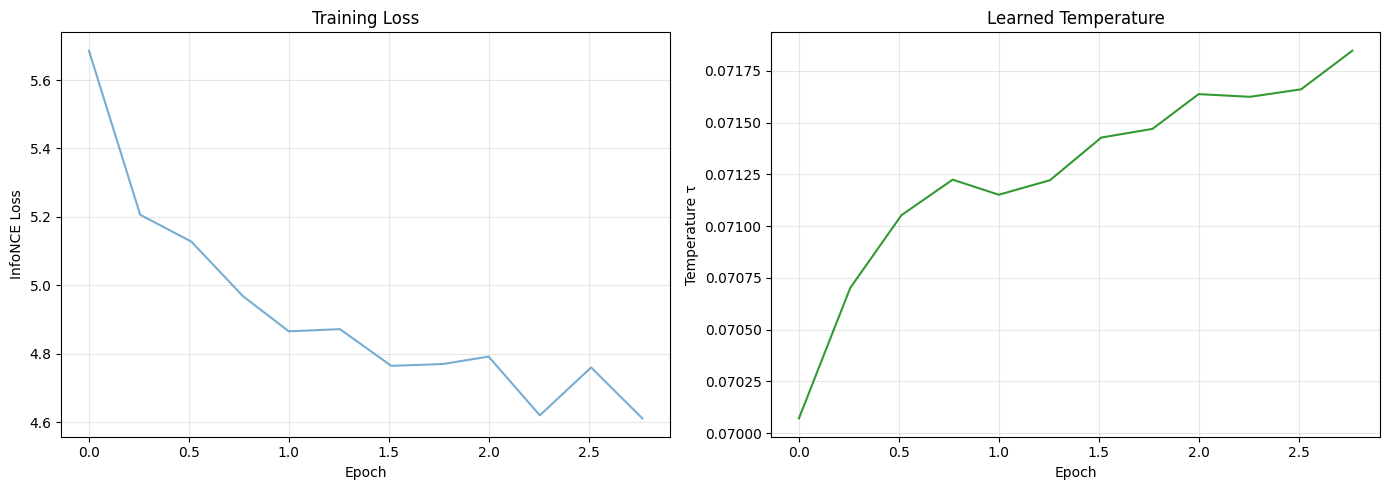


Observations:
  - Final loss: 4.6110
  - Final temperature: 0.0718
  - Temperature increased from init (0.07)

PART 5: Evaluating Toy CLIP

✓ Created class embeddings: torch.Size([10, 256])

Evaluating on 1000 test images...


Zero-shot eval:   0%|          | 0/8 [00:00<?, ?it/s]


✓ Zero-shot accuracy: 50.30%

  Comparison:
    - Random guessing: 10%
    - Toy CLIP: 50.3%
    - Pretrained CLIP (from Part A): ~85-90%

  Not bad for a tiny model trained on 10k images!

PART 6: Text-to-Image Retrieval with Toy CLIP

✓ Created gallery of 64 images

Query: 'a photo of a dog'
------------------------------------------------------------
  1. Image 16 | Similarity: 0.586 | Label: dog
  2. Image 39 | Similarity: 0.554 | Label: dog
  3. Image 46 | Similarity: 0.530 | Label: cat
  4. Image 56 | Similarity: 0.528 | Label: horse
  5. Image  8 | Similarity: 0.524 | Label: cat
  6. Image 42 | Similarity: 0.509 | Label: dog
  7. Image 61 | Similarity: 0.499 | Label: cat
  8. Image 53 | Similarity: 0.482 | Label: cat


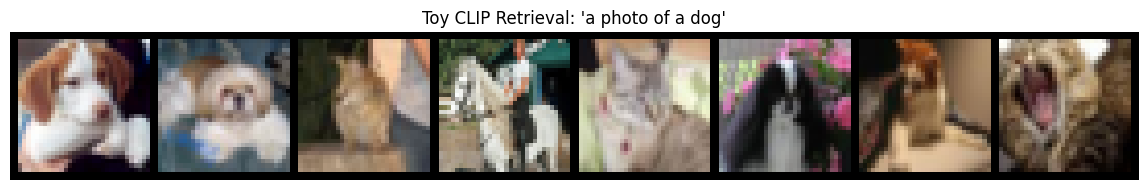


Query: 'an image of a truck'
------------------------------------------------------------
  1. Image 23 | Similarity: 0.588 | Label: truck
  2. Image 11 | Similarity: 0.581 | Label: truck
  3. Image 45 | Similarity: 0.562 | Label: truck
  4. Image 38 | Similarity: 0.546 | Label: truck
  5. Image 50 | Similarity: 0.542 | Label: truck
  6. Image 34 | Similarity: 0.542 | Label: truck
  7. Image 14 | Similarity: 0.535 | Label: truck
  8. Image 37 | Similarity: 0.514 | Label: automobile


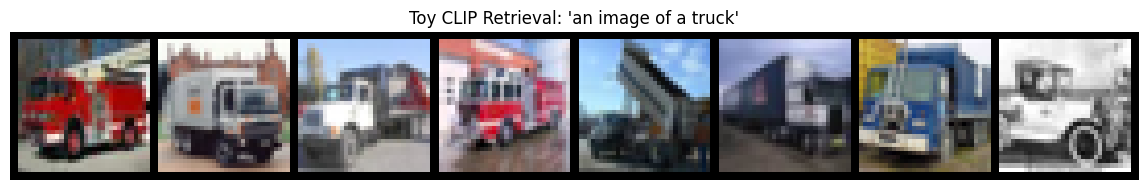


Query: 'a close-up photo of a cat'
------------------------------------------------------------
  1. Image 16 | Similarity: 0.571 | Label: dog
  2. Image 39 | Similarity: 0.561 | Label: dog
  3. Image 17 | Similarity: 0.549 | Label: horse
  4. Image  8 | Similarity: 0.533 | Label: cat
  5. Image 12 | Similarity: 0.532 | Label: dog
  6. Image  5 | Similarity: 0.530 | Label: frog
  7. Image  0 | Similarity: 0.527 | Label: cat
  8. Image 46 | Similarity: 0.527 | Label: cat


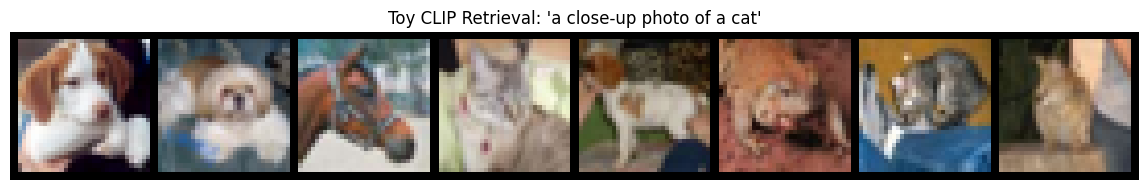


Summary

What We Built:
--------------
1. Toy image encoder (small CNN)
2. Toy text encoder (bag-of-words)
3. Combined into Toy CLIP with learnable temperature
4. Trained with symmetric InfoNCE loss

Key Observations:
-----------------
1. **Training converges quickly**
   - Loss drops significantly in just a few epochs
   - Even with simple architectures

2. **Temperature learns automatically**
   - Started at 0.07, adjusted during training
   - Controls the sharpness of similarity distribution

3. **Zero-shot works (somewhat!)**
   - Toy CLIP achieves better-than-random accuracy
   - Not as good as pretrained CLIP, but demonstrates the concept

4. **Scale matters**
   - Pretrained CLIP: 400M pairs, ViT encoder, Transformer text
   - Toy CLIP: 10k pairs, small CNN, bag-of-words
   - The mechanism is the same, just different scale!

Limitations:
------------
- Simple text encoder (bag-of-words) vs Transformer
- Small training set (10k) vs web-scale (400M)
- Synthetic captions ("a photo

In [ ]:
"""
Lecture 12.1 (Part B): Training Toy CLIP from Scratch
======================================================

This notebook builds on Part A and shows:
1. How to train a CLIP model from scratch (simplified)
2. The InfoNCE loss in action during training
3. How embeddings evolve during training

Goal: Understand the training mechanism, not beat pretrained CLIP!

Time requirement: ~10-15 minutes on GPU for 2-3 epochs
"""

import os, random, time
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import DataLoader, Subset

from torchvision import transforms
from torchvision.datasets import CIFAR10
from torchvision.utils import make_grid

# ============================================================
# Setup
# ============================================================

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

set_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

# ============================================================
# 1) Toy CLIP Architecture
# ============================================================
print("\n" + "="*60)
print("PART 1: Building Toy CLIP Architecture")
print("="*60)

class TinyImageEncoder(nn.Module):
    """
    Simplified image encoder: small CNN + pooling + projection

    Architecture:
    - 4 conv blocks with downsampling
    - Global average pooling
    - Linear projection to embedding dimension
    - L2 normalization
    """
    def __init__(self, embed_dim=256):
        super().__init__()
        self.conv_blocks = nn.Sequential(
            # 32×32 → 16×16
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.GELU(),

            # 16×16 → 8×8
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.GELU(),

            # 8×8 → 4×4
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.GELU(),

            # 4×4 → 2×2
            nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.GELU(),

            # Global pooling: 2×2 → 1×1
            nn.AdaptiveAvgPool2d((1, 1)),
        )

        # Project to embedding space
        self.projection = nn.Linear(256, embed_dim)

    def forward(self, x):
        """
        Args:
            x: (batch_size, 3, 32, 32)
        Returns:
            embeddings: (batch_size, embed_dim), L2-normalized
        """
        features = self.conv_blocks(x)           # (B, 256, 1, 1)
        features = features.flatten(1)           # (B, 256)
        embeddings = self.projection(features)   # (B, embed_dim)

        # L2 normalization: critical for cosine similarity
        embeddings = F.normalize(embeddings, dim=-1)
        return embeddings


class TinyTextEncoder(nn.Module):
    """
    Simplified text encoder: bag-of-words with learned embeddings

    This is much simpler than CLIP's Transformer encoder, but
    demonstrates the key idea: map text to the same embedding space.

    Architecture:
    - Token embedding layer
    - Average pooling over tokens (bag-of-words)
    - Linear projection
    - L2 normalization
    """
    def __init__(self, vocab, embed_dim=256):
        super().__init__()
        self.vocab = vocab
        self.stoi = {word: i for i, word in enumerate(vocab)}  # string to index

        # Token embeddings
        self.token_embeddings = nn.Embedding(len(vocab), embed_dim)

        # Projection (optional, but helps)
        self.projection = nn.Linear(embed_dim, embed_dim)

    def tokenize(self, texts):
        """
        Simple whitespace tokenization.
        Args:
            texts: list of strings
        Returns:
            tokens: (batch_size, max_length) LongTensor
        """
        pad_id = self.stoi["<pad>"]
        unk_id = self.stoi["<unk>"]

        # Tokenize each text
        all_token_ids = []
        for text in texts:
            tokens = text.lower().split()
            token_ids = [self.stoi.get(tok, unk_id) for tok in tokens]
            if len(token_ids) == 0:
                token_ids = [unk_id]
            all_token_ids.append(token_ids)

        # Pad to same length
        max_len = max(len(ids) for ids in all_token_ids)
        batch = torch.full((len(texts), max_len), pad_id,
                          dtype=torch.long, device=self.token_embeddings.weight.device)

        for i, token_ids in enumerate(all_token_ids):
            batch[i, :len(token_ids)] = torch.tensor(token_ids, dtype=torch.long)

        return batch

    def forward(self, texts):
        """
        Args:
            texts: list of strings
        Returns:
            embeddings: (batch_size, embed_dim), L2-normalized
        """
        tokens = self.tokenize(texts)              # (B, L)
        embeddings = self.token_embeddings(tokens) # (B, L, embed_dim)

        # Average pooling (bag-of-words)
        embeddings = embeddings.mean(dim=1)        # (B, embed_dim)

        # Project
        embeddings = self.projection(embeddings)   # (B, embed_dim)

        # L2 normalize
        embeddings = F.normalize(embeddings, dim=-1)
        return embeddings


class ToyCLIP(nn.Module):
    """
    Toy CLIP: combines image and text encoders with learnable temperature.
    """
    def __init__(self, vocab, image_dim=256, text_dim=256, init_tau=0.07):
        super().__init__()
        self.image_encoder = TinyImageEncoder(embed_dim=image_dim)
        self.text_encoder = TinyTextEncoder(vocab=vocab, embed_dim=text_dim)

        # Learnable temperature (log-space for numerical stability)
        self.log_tau = nn.Parameter(torch.log(torch.tensor(init_tau)))

    @property
    def tau(self):
        """Temperature parameter (always positive via exp)"""
        return self.log_tau.exp()

    def forward(self, images, texts):
        """
        Args:
            images: (B, 3, 32, 32)
            texts: list of B strings
        Returns:
            image_embeddings: (B, dim)
            text_embeddings: (B, dim)
        """
        image_embeddings = self.image_encoder(images)
        text_embeddings = self.text_encoder(texts)
        return image_embeddings, text_embeddings


def info_nce_loss(image_embeddings, text_embeddings, temperature):
    """
    Symmetric InfoNCE loss (CLIP's training objective).

    For each image-text pair (i, i):
    - Positive: similarity between image_i and text_i
    - Negatives: similarities to all other texts in batch

    We compute this in both directions and average.

    Args:
        image_embeddings: (N, d), L2-normalized
        text_embeddings: (N, d), L2-normalized
        temperature: scalar
    Returns:
        loss: scalar
    """
    # Similarity matrix: (N, N)
    logits = (image_embeddings @ text_embeddings.T) / temperature

    # Ground truth: diagonal (i matched with i)
    N = image_embeddings.size(0)
    labels = torch.arange(N, device=logits.device)

    # Image → Text classification
    loss_i2t = F.cross_entropy(logits, labels)

    # Text → Image classification (transpose)
    loss_t2i = F.cross_entropy(logits.T, labels)

    # Symmetric average
    loss = 0.5 * (loss_i2t + loss_t2i)

    return loss


print("\n✓ Toy CLIP architecture defined")
print("  - TinyImageEncoder: CNN with 4 conv blocks")
print("  - TinyTextEncoder: Bag-of-words with embeddings")
print("  - ToyCLIP: Combines both + learnable temperature")

# ============================================================
# 2) Prepare Training Data
# ============================================================
print("\n" + "="*60)
print("PART 2: Preparing Training Data")
print("="*60)

# CIFAR-10 with simple augmentation
IMAGE_SIZE = 32  # Keep native CIFAR size
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load CIFAR-10
cifar_train_base = CIFAR10("./data", train=True, download=True)
cifar_test_base = CIFAR10("./data", train=False, download=True)

CIFAR_CLASSES = cifar_train_base.classes

# Simple caption templates
CAPTION_TEMPLATES = [
    "a photo of a {}",
    "a small {}",
    "a close-up photo of a {}",
    "an image of a {}",
    "a picture of a {}",
]


class CIFARWithCaptions(torch.utils.data.Dataset):
    """
    CIFAR-10 wrapper that generates synthetic captions.
    """
    def __init__(self, base_dataset, transform, caption_templates, classes):
        self.base = base_dataset
        self.transform = transform
        self.templates = caption_templates
        self.classes = classes

    def __len__(self):
        return len(self.base)

    def __getitem__(self, idx):
        img, label = self.base[idx]
        img = self.transform(img)

        # Generate random caption
        template = random.choice(self.templates)
        caption = template.format(self.classes[label])

        return img, caption, label


train_dataset = CIFARWithCaptions(
    cifar_train_base, train_transform, CAPTION_TEMPLATES, CIFAR_CLASSES
)

test_dataset = CIFARWithCaptions(
    cifar_test_base, test_transform, CAPTION_TEMPLATES, CIFAR_CLASSES
)

# Use subset for faster training (increase for better results)
TRAIN_SIZE = 10000  # Full CIFAR-10 has 50k training images
train_indices = list(range(TRAIN_SIZE))
train_subset = Subset(train_dataset, train_indices)

print(f"\n✓ Training on {TRAIN_SIZE} CIFAR-10 images")
print(f"  Caption templates: {len(CAPTION_TEMPLATES)}")
print(f"  Example caption: '{CAPTION_TEMPLATES[0].format(CIFAR_CLASSES[0])}'")


# Build vocabulary from training captions
def build_vocabulary(dataset, max_samples=5000):
    """Build vocabulary from dataset captions."""
    vocab = set()
    sample_indices = random.sample(range(len(dataset)),
                                  min(max_samples, len(dataset)))

    for idx in sample_indices:
        _, caption, _ = dataset[idx]
        for token in caption.lower().split():
            vocab.add(token)

    # Add special tokens
    vocab_list = ["<pad>", "<unk>"] + sorted(vocab)
    return vocab_list

print("\nBuilding vocabulary...")
vocabulary = build_vocabulary(train_subset)
print(f"✓ Vocabulary size: {len(vocabulary)}")
print(f"  First 10 tokens: {vocabulary[:10]}")

# ============================================================
# 3) Training Loop
# ============================================================
print("\n" + "="*60)
print("PART 3: Training Toy CLIP")
print("="*60)

# Hyperparameters
BATCH_SIZE = 256
LEARNING_RATE = 1e-3
WEIGHT_DECAY = 0.01
NUM_EPOCHS = 3  # Increase for better results

# Create model
model = ToyCLIP(
    vocab=vocabulary,
    image_dim=256,
    text_dim=256,
    init_tau=0.07
).to(device)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\n✓ Model created")
print(f"  Total parameters: {total_params:,}")
print(f"  Trainable parameters: {trainable_params:,}")

# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

# DataLoader
train_loader = DataLoader(
    train_subset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True,
    drop_last=True  # For stable batch statistics
)

print(f"\n✓ Training setup complete")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Learning rate: {LEARNING_RATE}")
print(f"  Batches per epoch: {len(train_loader)}")

# Training history
history = {
    'loss': [],
    'tau': [],
    'epoch': []
}

print("\n" + "-"*60)
print("Starting Training")
print("-"*60)

for epoch in range(NUM_EPOCHS):
    model.train()
    epoch_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}")

    for batch_idx, (images, captions, labels) in enumerate(progress_bar):
        images = images.to(device)

        # Forward pass
        image_embeddings, text_embeddings = model(images, captions)

        # Compute loss
        loss = info_nce_loss(image_embeddings, text_embeddings, model.tau)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Gradient clipping (optional but helps stability)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        # Logging
        epoch_loss += loss.item()
        progress_bar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'tau': f'{model.tau.item():.4f}'
        })

        # Record history
        if batch_idx % 10 == 0:
            history['loss'].append(loss.item())
            history['tau'].append(model.tau.item())
            history['epoch'].append(epoch + batch_idx / len(train_loader))

    # Epoch summary
    avg_loss = epoch_loss / len(train_loader)
    print(f"\nEpoch {epoch+1} Summary:")
    print(f"  Average loss: {avg_loss:.4f}")
    print(f"  Temperature τ: {model.tau.item():.4f}")
    print()

print("✓ Training complete!")

# ============================================================
# 4) Visualize Training Progress
# ============================================================
print("\n" + "="*60)
print("PART 4: Analyzing Training")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
axes[0].plot(history['epoch'], history['loss'], alpha=0.6)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('InfoNCE Loss')
axes[0].set_title('Training Loss')
axes[0].grid(alpha=0.3)

# Add smoothed curve
from scipy.ndimage import uniform_filter1d
if len(history['loss']) > 20:
    smoothed = uniform_filter1d(history['loss'], size=20)
    axes[0].plot(history['epoch'], smoothed, 'r-', linewidth=2, label='Smoothed')
    axes[0].legend()

# Temperature evolution
axes[1].plot(history['epoch'], history['tau'], 'g-', alpha=0.8)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Temperature τ')
axes[1].set_title('Learned Temperature')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('toy_clip_training.png', dpi=150, bbox_inches='tight')
print("✓ Saved training curves to 'toy_clip_training.png'")
plt.show()

print("\nObservations:")
print(f"  - Final loss: {history['loss'][-1]:.4f}")
print(f"  - Final temperature: {history['tau'][-1]:.4f}")
print(f"  - Temperature {'increased' if history['tau'][-1] > 0.07 else 'decreased'} from init (0.07)")

# ============================================================
# 5) Evaluate Toy CLIP
# ============================================================
print("\n" + "="*60)
print("PART 5: Evaluating Toy CLIP")
print("="*60)

model.eval()

# Create text embeddings for all classes
with torch.no_grad():
    class_captions = [f"a photo of a {cls}" for cls in CIFAR_CLASSES]
    class_embeddings = model.text_encoder(class_captions)  # (10, 256)

print(f"\n✓ Created class embeddings: {class_embeddings.shape}")

# Zero-shot evaluation on test set
N_TEST = 1000
test_indices = list(range(N_TEST))
test_subset = Subset(test_dataset, test_indices)
test_loader = DataLoader(test_subset, batch_size=128, shuffle=False)

correct = 0
total = 0

print(f"\nEvaluating on {N_TEST} test images...")
with torch.no_grad():
    for images, captions, labels in tqdm(test_loader, desc="Zero-shot eval"):
        images = images.to(device)

        # Get image embeddings
        image_embeddings = model.image_encoder(images)

        # Compute similarities
        logits = 100.0 * image_embeddings @ class_embeddings.T  # (B, 10)
        predictions = logits.argmax(dim=-1).cpu()

        correct += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = 100.0 * correct / total
print(f"\n✓ Zero-shot accuracy: {accuracy:.2f}%")
print(f"\n  Comparison:")
print(f"    - Random guessing: 10%")
print(f"    - Toy CLIP: {accuracy:.1f}%")
print(f"    - Pretrained CLIP (from Part A): ~85-90%")
print(f"\n  Not bad for a tiny model trained on 10k images!")

# ============================================================
# 6) Retrieval Demo
# ============================================================
print("\n" + "="*60)
print("PART 6: Text-to-Image Retrieval with Toy CLIP")
print("="*60)

# Create gallery
gallery_size = 64
gallery_indices = list(range(gallery_size))
gallery_subset = Subset(test_dataset, gallery_indices)
gallery_loader = DataLoader(gallery_subset, batch_size=gallery_size, shuffle=False)

gallery_images, gallery_captions, gallery_labels = next(iter(gallery_loader))
gallery_images = gallery_images.to(device)

with torch.no_grad():
    gallery_embeddings = model.image_encoder(gallery_images)

print(f"\n✓ Created gallery of {gallery_size} images")

def retrieve_with_toy_clip(query, top_k=8):
    """Retrieve images using trained toy CLIP."""
    with torch.no_grad():
        query_embedding = model.text_encoder([query])
        similarities = (gallery_embeddings @ query_embedding.T).squeeze(1)

        top_k_scores, top_k_indices = similarities.topk(top_k)

        # Move indices to CPU for indexing CPU tensors
        top_k_indices_cpu = top_k_indices.cpu()
        retrieved = gallery_images[top_k_indices_cpu].cpu()
        retrieved_labels = gallery_labels[top_k_indices_cpu]

        # Display
        grid = make_grid(retrieved, nrow=top_k, padding=2, normalize=True)

        print(f"\nQuery: '{query}'")
        print("-" * 60)
        for i, (idx, score, label) in enumerate(zip(top_k_indices_cpu, top_k_scores.cpu(), retrieved_labels)):
            print(f"  {i+1}. Image {idx.item():2d} | "
                  f"Similarity: {score.item():.3f} | "
                  f"Label: {CIFAR_CLASSES[label]}")

        plt.figure(figsize=(15, 2))
        plt.imshow(transforms.ToPILImage()(grid))
        plt.axis('off')
        plt.title(f"Toy CLIP Retrieval: '{query}'", fontsize=12)
        plt.tight_layout()
        plt.show()

# Try retrieval
retrieve_with_toy_clip("a photo of a dog", top_k=8)
retrieve_with_toy_clip("an image of a truck", top_k=8)
retrieve_with_toy_clip("a close-up photo of a cat", top_k=8)

# ============================================================
# 7) Summary
# ============================================================
print("\n" + "="*60)
print("Summary")
print("="*60)

print("""
What We Built:
--------------
1. Toy image encoder (small CNN)
2. Toy text encoder (bag-of-words)
3. Combined into Toy CLIP with learnable temperature
4. Trained with symmetric InfoNCE loss

Key Observations:
-----------------
1. **Training converges quickly**
   - Loss drops significantly in just a few epochs
   - Even with simple architectures

2. **Temperature learns automatically**
   - Started at 0.07, adjusted during training
   - Controls the sharpness of similarity distribution

3. **Zero-shot works (somewhat!)**
   - Toy CLIP achieves better-than-random accuracy
   - Not as good as pretrained CLIP, but demonstrates the concept

4. **Scale matters**
   - Pretrained CLIP: 400M pairs, ViT encoder, Transformer text
   - Toy CLIP: 10k pairs, small CNN, bag-of-words
   - The mechanism is the same, just different scale!

Limitations:
------------
- Simple text encoder (bag-of-words) vs Transformer
- Small training set (10k) vs web-scale (400M)
- Synthetic captions ("a photo of X") vs rich descriptions
- Small image size (32×32) vs high-res (224×224)

Extensions to Try:
------------------
1. Train longer (more epochs)
2. Use more data (full CIFAR-10)
3. Improve text encoder (use RNN or Transformer)
4. Try different datasets
5. Experiment with temperature initialization

Key Takeaway:
-------------
The InfoNCE loss and contrastive learning framework are
surprisingly simple yet incredibly powerful. With the right
data and scale, this mechanism enables zero-shot transfer
and multimodal understanding!
""")

print("\n✓ Notebook complete!")
print("="*60)